# Dust extinction models in Rubix

This notebook shows the basics of the dust extinction models implemented in Rubix. We have closely followed the implementation by the [dust extinction package](https://dust-extinction.readthedocs.io/en/latest/index.html). Currently we only support a subset of all available models.

In [1]:
# NBVAL_SKIP
from rubix.spectra.dust.extinction_models import Cardelli89, Gordon23

In [2]:
# NBVAL_SKIP
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp

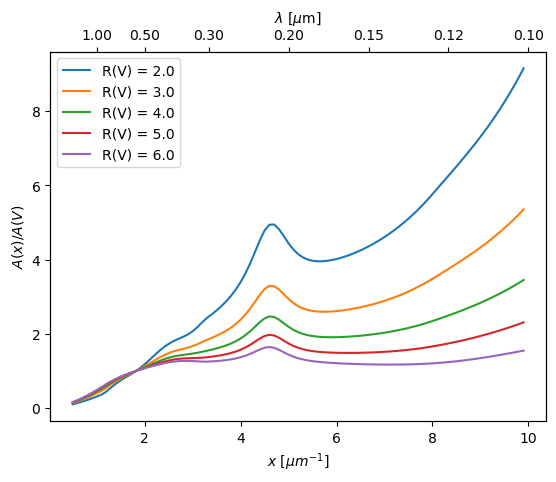

In [3]:
# NBVAL_SKIP
fig, ax = plt.subplots()

# generate the curves and plot them
x = np.arange(0.5,10.0,0.1) # in 1/microns
Rvs = [2.0,3.0,4.0,5.0,6.0]
for cur_Rv in Rvs:
    ext_model = Cardelli89(Rv=cur_Rv)
    ax.plot(x,ext_model(x),label='R(V) = ' + str(cur_Rv))

ax.set_xlabel(r'$x$ [$\mu m^{-1}$]')
ax.set_ylabel(r'$A(x)/A(V)$')

# for 2nd x-axis with lambda values
axis_xs = np.array([0.1, 0.12, 0.15, 0.2, 0.3, 0.5, 1.0])
new_ticks = 1 / axis_xs
new_ticks_labels = ["%.2f" % z for z in axis_xs]
tax = ax.twiny()
tax.set_xlim(ax.get_xlim())
tax.set_xticks(new_ticks)
tax.set_xticklabels(new_ticks_labels)
tax.set_xlabel(r"$\lambda$ [$\mu$m]")

ax.legend(loc='best')

In [4]:
# NBVAL_SKIP
# initialize cardelli model with Rv=3.1
ext = Cardelli89(Rv=3.1)

In [5]:
# NBVAL_SKIP
# generate wavelengths between 3 and 10 microns
#    within the valid range for the Cardelli R(V) dependent model
lam = np.logspace(np.log10(3), np.log10(10.0), num=1000)

In [6]:
# NBVAL_SKIP
# setup the inputs for the blackbody function
wavelengths = lam*1e4 # Angstroem
temperature = 10000 # Kelvin

In [7]:
# NBVAL_SKIP
from astropy.modeling.models import BlackBody
import astropy.units as u

In [8]:
# NBVAL_SKIP
# get the blackbody flux
bb_lam = BlackBody(10000*u.K, scale=1.0 * u.erg / (u.cm ** 2 * u.AA * u.s * u.sr))
flux = bb_lam(wavelengths)

In [9]:
# NBVAL_SKIP
# get the extinguished blackbody flux for different amounts of dust
flux_ext_av05 = flux*ext.extinguish(lam, Av=0.5)
flux_ext_av15 = flux*ext.extinguish(lam, Av=1.5)
flux_ext_ebv10 = flux*ext.extinguish(lam, Ebv=1.0)

<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
/var/folders/c2/61w7yp_x4yd0_21snh453rmm0000gq/T/ipykernel_95433/3016050321.py:10: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$\lambda$ [$\AA$]')


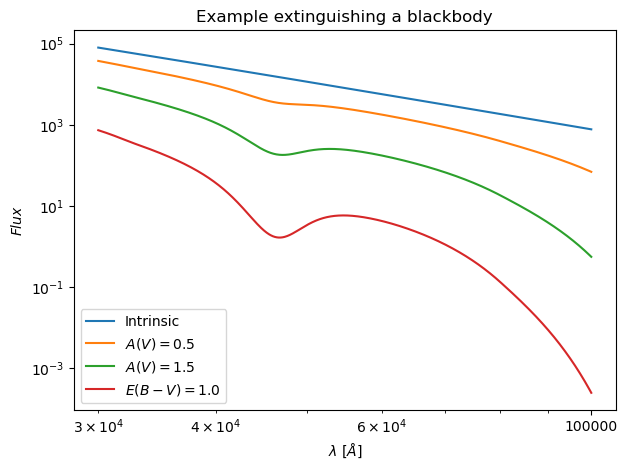

In [10]:
# NBVAL_SKIP
# plot the intrinsic and extinguished fluxes
from matplotlib.ticker import ScalarFormatter
fig, ax = plt.subplots()

ax.plot(wavelengths, flux, label='Intrinsic')
ax.plot(wavelengths, flux_ext_av05, label='$A(V) = 0.5$')
ax.plot(wavelengths, flux_ext_av15, label='$A(V) = 1.5$')
ax.plot(wavelengths, flux_ext_ebv10, label='$E(B-V) = 1.0$')

ax.set_xlabel('$\lambda$ [$\AA$]')
ax.set_ylabel('$Flux$')

ax.set_xscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_yscale('log')

ax.set_title('Example extinguishing a blackbody')

ax.legend(loc='best')
plt.tight_layout()

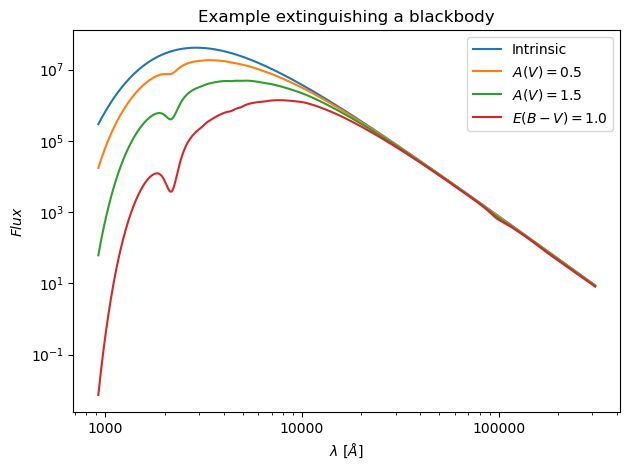

In [11]:
# NBVAL_SKIP
# generate wavelengths between 0.092 and 31 microns
#    within the valid range for the Gordon23 R(V) dependent relationship
lam = jnp.logspace(np.log10(0.092), np.log10(31.0), num=1000)

# setup the inputs for the blackbody function
wavelengths = lam*1e4 # Angstroem
temperature = 10000 # Kelvin

# get the blackbody flux
bb_lam = BlackBody(10000*u.K, scale=1.0 * u.erg / (u.cm ** 2 * u.AA * u.s * u.sr))
flux = bb_lam(wavelengths)

# initialize the model
ext = Gordon23(Rv=3.1)

# get the extinguished blackbody flux for different amounts of dust
flux_ext_av05 = flux*ext.extinguish(lam, Av=0.5)
flux_ext_av15 = flux*ext.extinguish(lam, Av=1.5)
flux_ext_ebv10 = flux*ext.extinguish(lam, Ebv=1.0)

# plot the intrinsic and extinguished fluxes
fig, ax = plt.subplots()

ax.plot(wavelengths, flux, label='Intrinsic')
ax.plot(wavelengths, flux_ext_av05, label='$A(V) = 0.5$')
ax.plot(wavelengths, flux_ext_av15, label='$A(V) = 1.5$')
ax.plot(wavelengths, flux_ext_ebv10, label='$E(B-V) = 1.0$')

ax.set_xlabel(r'$\lambda$ [$\AA$]')
ax.set_ylabel('$Flux$')

ax.set_xscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_yscale('log')

ax.set_title('Example extinguishing a blackbody')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

# Run the pipeline with dust


In [1]:

# NBVAL_SKIP
ILLUSTRIS_API_KEY="c0112e1fa11489ef0e6164480643d1c8"

import os
os.environ["SPS_HOME"] = '/Users/buck/Documents/Nexus/codes/fsps'


In [2]:
#NBVAL_SKIP

import matplotlib.pyplot as plt
from rubix.core.pipeline import RubixPipeline 
import os
config = {
    "pipeline":{"name": "calc_ifu"},
    
    "logger": {
        "log_level": "DEBUG",
        "log_file_path": None,
        "format": "%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    },
    "data": {
        "name": "IllustrisAPI",
        "args": {
            "api_key": ILLUSTRIS_API_KEY,
            "particle_type": ["stars", "gas"],
            "simulation": "TNG50-1",
            "snapshot": 99,
            "save_data_path": "data",
        },
        
        "load_galaxy_args": {
        "id": 11,
        "reuse": False,
        },
        
        "subset": {
            "use_subset": True,
            "subset_size": 5000,
        },
    },
    "simulation": {
        "name": "IllustrisTNG",
        "args": {
            "path": "data/galaxy-id-11.hdf5",
        },
    
    },
    "output_path": "output",

    "telescope":
        {"name": "MUSE",
         "psf": {"name": "gaussian", "size": 5, "sigma": 0.6},
         "lsf": {"sigma": 0.5},
         "noise": {"signal_to_noise": 1,"noise_distribution": "normal"},},
    "cosmology":
        {"name": "PLANCK15"},
        
    "galaxy":
        {"dist_z": 0.1,
         "rotation": {"type": "edge-on"},
        },
        
    "ssp": {
        "template": {
            "name": "BruzualCharlot2003"
        },
        "dust": {
            "extinction_model": "Cardelli89", #"Gordon23", 
            "dust_to_gas_ratio": 0.01, # need to check Remyer's paper
            "dust_to_metals_ratio": 0.4, # do we need this ratio if we set the dust_to_gas_ratio?
            "dust_grain_density": 3.5, # g/cm^3 #check this value
            "Rv": 3.1,
        },
    },        
}

2025-02-10 15:38:37,987 - rubix - INFO - 
   ___  __  _____  _____  __
  / _ \/ / / / _ )/  _/ |/_/
 / , _/ /_/ / _  |/ /_>  <
/_/|_|\____/____/___/_/|_|


2025-02-10 15:38:37,987 - rubix - INFO - Rubix version: 0.0.post337+g16c3984.d20250129
/Users/buck/Documents/Nexus/Projects/rubix/rubix/spectra/dust/dust_extinction.py:18: SyntaxWarning: invalid escape sequence '\S'
  """
/Users/buck/Documents/Nexus/Projects/rubix/rubix/spectra/dust/dust_extinction.py:77: SyntaxWarning: invalid escape sequence '\l'
  """


In [3]:
#NBVAL_SKIP
pipe = RubixPipeline(config)

rubixdata = pipe.run()

/Users/buck/Documents/Nexus/Projects/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /Users/buck/Documents/Nexus/Projects/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
2025-02-10 15:38:38,206 - rubix - INFO - Getting rubix data...
2025-02-10 15:38:38,207 - rubix - INFO - Loading data from IllustrisAPI
2025-02-10 15:38:38,207 - rubix - DEBUG - Loading galaxy with ID 11
2025-02-10 15:38:38,207 - rubix - DEBUG - Performing GET request from http://www.tng-project.org/api/TNG50-1/snapshots/99/subhalos/11/cutout.hdf5?stars=Coordinates,GFM_InitialMass,GFM_Metallicity,GFM_StellarFormationTime,Velocities&gas=Coordinates,Density,Masses,GFM_Metallicity,GFM_Metals,StarFormationRate,InternalEnergy,Velocities,ElectronAbundance, with parameters None
2025-02-10 15:38:42,045 - rubix - DEBUG - Performing GET request from http://www.tng-project.org/api/TNG50-1/snapshots/99/subhalos/11, with parameters None
2025-02-10 15:38:42,241 - rubix - 

KeyError: 'metals'

In [4]:
# NBVAL_SKIP
ILLUSTRIS_API_KEY="c0112e1fa11489ef0e6164480643d1c8"

import os
os.environ["SPS_HOME"] = '/Users/buck/Documents/Nexus/codes/fsps'

In [ ]:
#NBVAL_SKIP

import matplotlib.pyplot as plt
from rubix.core.pipeline import RubixPipeline 
import os
config = {
    "pipeline":{"name": "calc_dusty_ifu"},
    
    "logger": {
        "log_level": "DEBUG",
        "log_file_path": None,
        "format": "%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    },
    "data": {
        "name": "IllustrisAPI",
        "args": {
            "api_key": ILLUSTRIS_API_KEY,
            "particle_type": ["stars", "gas"],
            "simulation": "TNG50-1",
            "snapshot": 99,
            "save_data_path": "data",
        },
        
        "load_galaxy_args": {
        "id": 11,
        "reuse": False,
        },
        
        "subset": {
            "use_subset": True,
            "subset_size": 5000,
        },
    },
    "simulation": {
        "name": "IllustrisTNG",
        "args": {
            "path": "data/galaxy-id-11.hdf5",
        },
    
    },
    "output_path": "output",

    "telescope":
        {"name": "MUSE",
         "psf": {"name": "gaussian", "size": 5, "sigma": 0.6},
         "lsf": {"sigma": 0.5},
         "noise": {"signal_to_noise": 1,"noise_distribution": "normal"},},
    "cosmology":
        {"name": "PLANCK15"},
        
    "galaxy":
        {"dist_z": 0.1,
         "rotation": {"type": "edge-on"},
        },
        
    "ssp": {
        "template": {
            "name": "BruzualCharlot2003"
        },
        "dust": {
            "extinction_model": "Cardelli89", #"Gordon23", 
            "dust_to_gas_ratio": 0.01, # need to check Remyer's paper
            "dust_to_metals_ratio": 0.4, # do we need this ratio if we set the dust_to_gas_ratio?
            "dust_grain_density": 3.0, # #check this value, reverse engeneered from Ibarrra-Medel 2018
            "Rv": 3.1,
        },
    },        
}

In [7]:
#NBVAL_SKIP
pipe = RubixPipeline(config)

rubixdata_dust = pipe.run()

/Users/buck/Documents/Nexus/Projects/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /Users/buck/Documents/Nexus/Projects/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
2025-02-10 11:20:41,238 - rubix - INFO - Getting rubix data...
2025-02-10 11:20:41,239 - rubix - INFO - Rubix galaxy file already exists, skipping conversion
2025-02-10 11:20:41,266 - rubix - INFO - Centering stars particles
2025-02-10 11:20:41,586 - rubix - WARNING - The Subset value is set in config. Using only subset of size 5000 for stars
2025-02-10 11:20:41,588 - rubix - INFO - Centering gas particles
2025-02-10 11:20:41,617 - rubix - WARNING - The Subset value is set in config. Using only subset of size 5000 for gas
2025-02-10 11:20:41,619 - rubix - INFO - Data loaded with 5000 star particles and 5000 gas particles.
2025-02-10 11:20:41,636 - rubix - INFO - Setting up the pipeline...
2025-02-10 11:20:41,636 - rubix - DEBUG - Pipeline Configuration: {'T

Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 0. 0. ... 0. 0. 0.]
Av_array: [0. 

2025-02-10 11:20:57,465 - rubix - INFO - Pipeline run completed in 15.83 seconds.


(25, 25, 3721)
(25, 25, 3721)


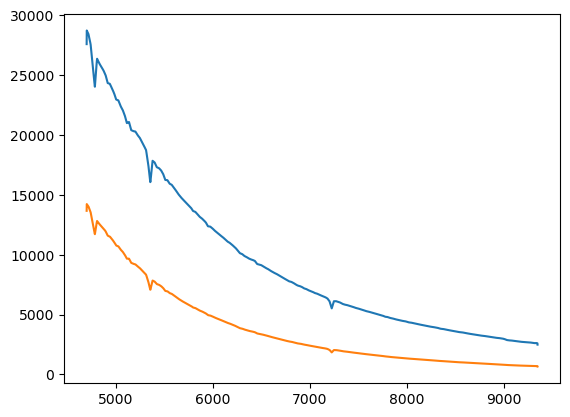

In [8]:
#NBVAL_SKIP
wave = pipe.telescope.wave_seq

spectra = rubixdata.stars.datacube # Spectra of all stars
dusty_spectra = rubixdata_dust.stars.datacube # Spectra of all stars
print(spectra.shape)
print(dusty_spectra.shape)

plt.plot(wave, spectra[12,12,:])
plt.plot(wave, dusty_spectra[12,12,:])

(25, 25, 3721)


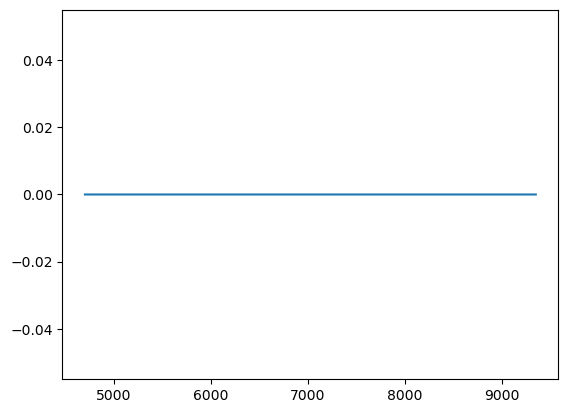

In [8]:
#NBVAL_SKIP
wave = pipe.telescope.wave_seq

#spectra = rubixdata.stars.datacube # Spectra of all stars
dusty_spectra = rubixdata_dust.stars.datacube # Spectra of all stars
#print(spectra.shape)
print(dusty_spectra.shape)

#plt.plot(wave, spectra[12,12,:])
plt.plot(wave, dusty_spectra[12,12,:])

# Let's plot some example spectra